In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Load data from CSV
def load_data(filename='simulated_data.csv'):
    data = pd.read_csv(filename)
    time_data = data['Time'].values
    x_data = data['X'].values
    y_data = data['Y'].values
    z_data = data['Z'].values
    return time_data, x_data, y_data, z_data

In [29]:
# Plot data
def plot_data(time_data, x_data, y_data, z_data):
    plt.figure(figsize=(12, 6))
    plt.plot(time_data, x_data, label='X')
    plt.plot(time_data, y_data, label='Y')
    plt.plot(time_data, z_data, label='Z')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration')
    plt.title('Accelerometer Data from CSV')
    plt.legend()
    plt.show()

In [25]:
# Train ML model
def train_model(x_data, y_data, z_data):
    X = np.column_stack((x_data, y_data, z_data))
    y = np.array([1 if max(row) > 8 else 0 for row in X])  # Label spikes as taps
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model accuracy:", model.score(X_test, y_test))
    return model

In [26]:
# Real-time tap detection simulation
def detect_tap(model, x_data, y_data, z_data):
    X = np.column_stack((x_data, y_data, z_data))
    for i in range(len(X)):
        prediction = model.predict([X[i]])
        if prediction == 1:
            print(f"Tap detected at index {i}!")

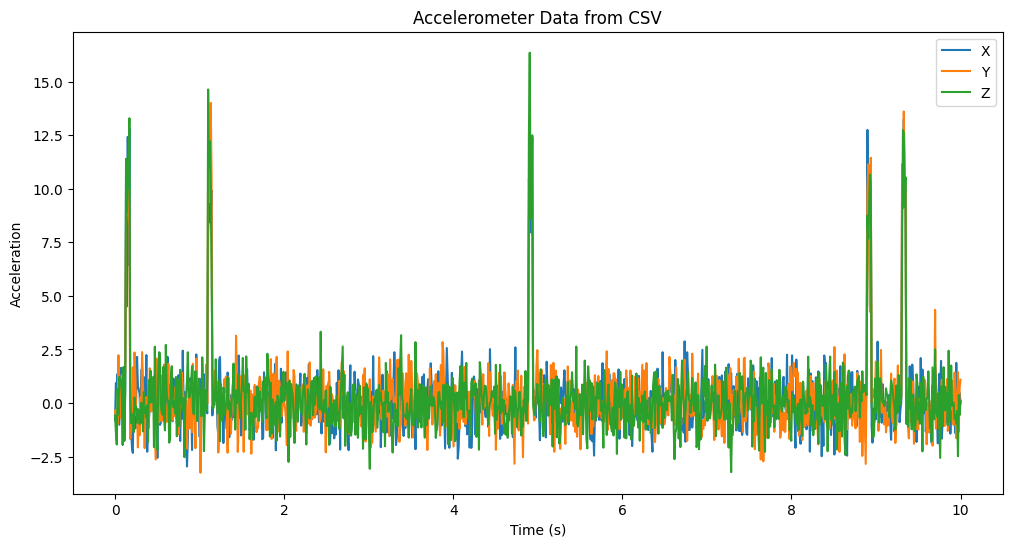

Model accuracy: 1.0
Tap detected at index 13!
Tap detected at index 14!
Tap detected at index 15!
Tap detected at index 16!
Tap detected at index 17!
Tap detected at index 110!
Tap detected at index 111!
Tap detected at index 112!
Tap detected at index 113!
Tap detected at index 114!
Tap detected at index 489!
Tap detected at index 490!
Tap detected at index 491!
Tap detected at index 492!
Tap detected at index 493!
Tap detected at index 889!
Tap detected at index 890!
Tap detected at index 891!
Tap detected at index 892!
Tap detected at index 893!
Tap detected at index 930!
Tap detected at index 931!
Tap detected at index 932!
Tap detected at index 933!
Tap detected at index 934!


In [30]:
# Main function
if __name__ == "__main__":
    time_data, x_data, y_data, z_data = load_data()  # Load data from CSV
    plot_data(time_data, x_data, y_data, z_data)
    model = train_model(x_data, y_data, z_data)
    detect_tap(model, x_data, y_data, z_data)